-----------------------------
## Practice Hands-on case study: Linear Regression

-----------------------------

Welcome to the Hands-on case study on Linear Regression. In this case study, we aim to construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name


- Also provided are the car labels (types) 
- Missing data values are marked by series of question marks.

## Import Libraries

In [51]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

## Load and review data

In [52]:
data = pd.read_csv("auto-mpg (1).csv")  
data.shape

(398, 9)

In [53]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [54]:
#dropping/ignoring car_name 
data = data.drop('car name', axis=1)
# Also replacing the categorical var with actual values
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


## Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [55]:
data = pd.get_dummies(data, columns=['origin'])
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## Dealing with Missing Values

In [56]:
#A quick summary of the data columns
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [57]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
data.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

### Q.2 The method  used to check whether an entry of a column is a numerical value or is it missing?


In [58]:
 # if the string is made of digits store True else False hint: use isdigit() 
hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit()) 


data[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [59]:
# Missing values have a'?''
# Replace missing values with NaN
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [60]:
#instead of dropping the rows, lets replace the missing values with median value. 
data.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

### Filling the missing values with median value

In [61]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)

medianFiller = lambda x: x.fillna(x.median())
data = data.apply(medianFiller,axis=0)



data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object / string type to float


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

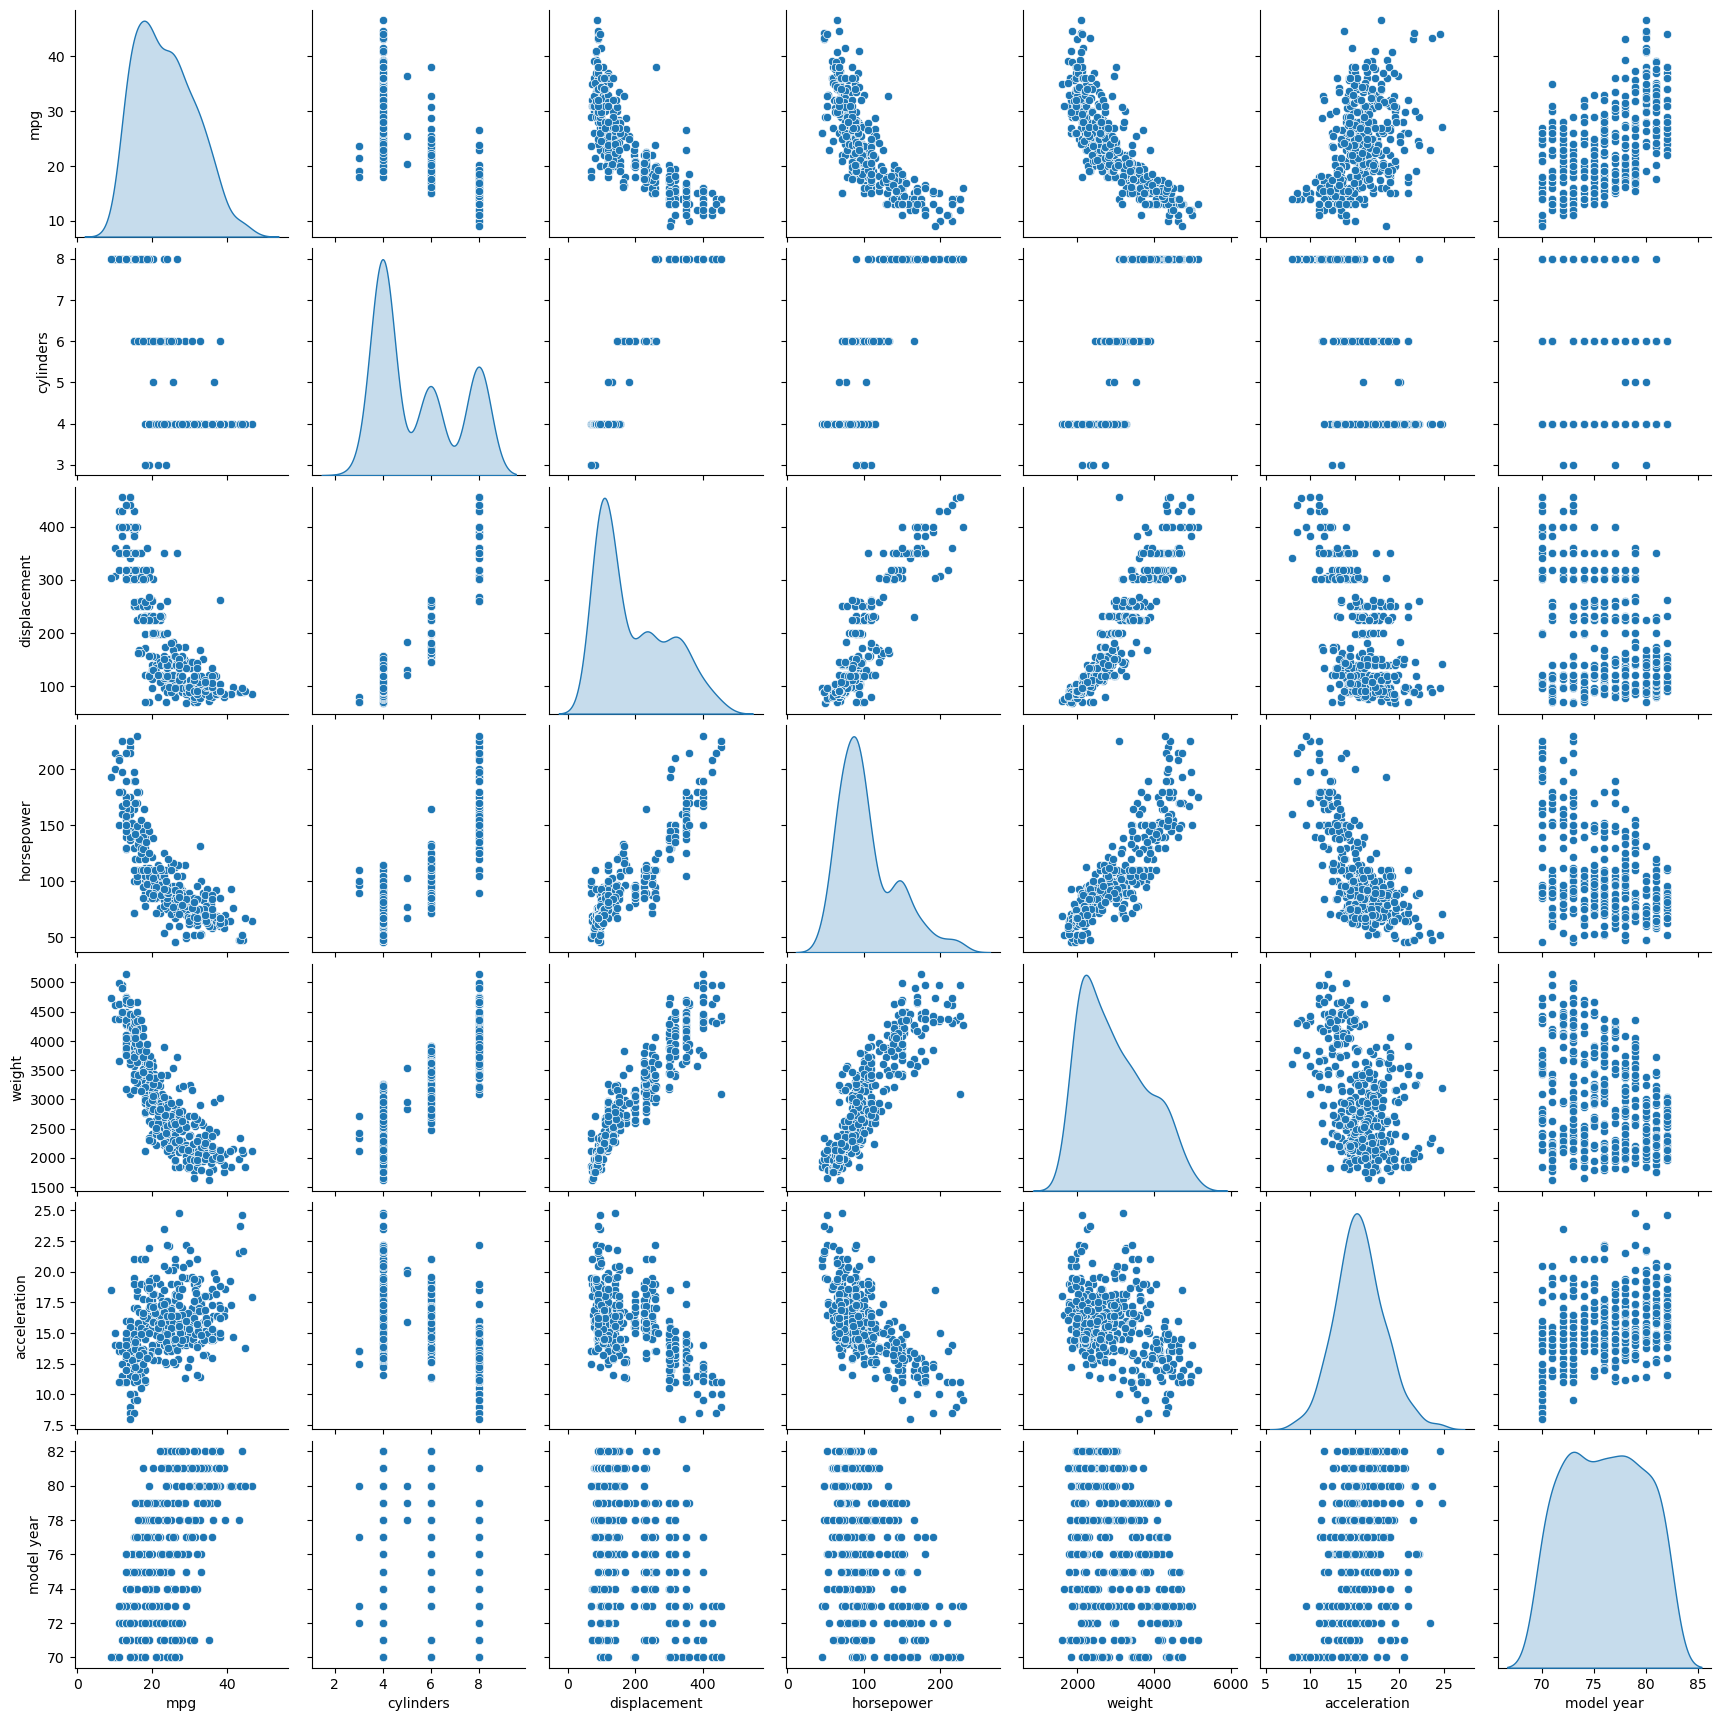

In [62]:
data_attr = data.iloc[:, 0:7]
sns.pairplot(data_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [63]:
# lets build our linear model
# independant variables
X = data.drop(columns = {'mpg','origin_europe'})
# the dependent variable
y = data['mpg']

In [64]:
# Sklearn package's model_selection have a function train_test_split() is used for data splitting into test(out of sample) and train dataset
from sklearn.model_selection import train_test_split


# Split X and y into training and test set(out of sample data) in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Q.3 & 4 Create linear regression model using statsmodels OLS and interpretate coefficient

In [65]:
# import libraries for building linear regression model
#using statsmodel

from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm

# let's add the intercept to data
X_train_ols = sm.add_constant(X_train)
X_test_ols=sm.add_constant(X_test)

# create the model

model1 = sm.OLS(y_train, X_train_ols).fit()


# get the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           1.20e-93
Time:                        21:11:41   Log-Likelihood:                -734.21
No. Observations:                 278   AIC:                             1486.
Df Residuals:                     269   BIC:                             1519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -18.2835      5.549     -3.

- Not all the variables are statistically significant to predict the outcome variable. To check which are statistically significant or have predictive power to predict the target variable, we need to check the `p-value` against all the independent variables.
- **Interpreting the Regression Results:**

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    
2. **coeff**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 
   
    Ha : Independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

* To be able to make statistical inferences from our model, **we will have to test the significance of the regression coefficients and linear regression assumptions.**

### Checking the performance of the model on the train and test data set

In [66]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model1, X_train_ols, X_test_ols,y_train,y_test)  

    Data      RMSE       MAE       MAPE
0  Train  3.394323  2.653321  12.445607
1   Test  3.026711  2.354281  11.147284


**Observations:**

* RMSE, MAE, and MAPE of train and test data are not very different, indicating that the **model is not overfitting and has generalized well.**

### Question 5: Performing cross validation and comparing its average performance to OLS performance

In [67]:
## Import required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Build the regression model using Sklearn Linear Regression
linearregression = LinearRegression()

# Perform cross-validation for R-Squared Score
cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv=10)  # 10-fold cross-validation

# Perform cross-validation for Mean Squared Error (MSE)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Print results
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1 * cv_Score12.mean(), cv_Score12.std() * 2))


RSquared: 0.798 (+/- 0.065)
Mean Squared Error: 12.386 (+/- 6.562)


### Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation.

In [68]:
coef = model1.params
coef

const            -18.283451
cylinders         -0.394808
displacement       0.028946
horsepower        -0.021752
weight            -0.007352
acceleration       0.061919
model year         0.836934
origin_america    -3.001283
origin_asia       -0.606018
dtype: float64

In [69]:
# Let us write the equation of the fit
Equation = "log (car_mileage) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (car_mileage) =	( -18.283451116372042 ) *  const + ( -0.3948079661648647 ) *  cylinders + ( 0.028945510765487535 ) *  displacement + ( -0.02175220772354662 ) *  horsepower + ( -0.007352032065147449 ) *  weight + ( 0.06191936600761827 ) *  acceleration + ( 0.8369338917645003 ) *  model year + ( -3.001283000918512 ) *  origin_america + ( -0.6060179643247414 ) *  origin_asia + 

### Building Decision Tree

In [70]:
#importing Decision tree regressor using sklearn

from sklearn.tree import DecisionTreeRegressor

In [71]:
# splitting the data in 70:30 ratio of train to test data
# separate the dependent and indepedent variable
Y1 = data['mpg']
X1 = data.drop(columns = {'mpg','origin_europe'})
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.30 , random_state=1)

### Question 6: Building Decision tree and Checking its performance

In [72]:
#defining the Descision tree regressor

dt = DecisionTreeRegressor(random_state=1) 

#Fitting Descision Tree regressor to train dataset

dt.fit(X_train1, y_train1)

DecisionTreeRegressor(random_state=1)

Checking model perform on the train and test dataset

In [73]:
model_pref(dt, X_train1, X_test1,y_train1,y_test1)  

    Data      RMSE       MAE       MAPE
0  Train  0.000000  0.000000   0.000000
1   Test  3.921777  2.521667  11.110139


**Observations:**

- **The model seem to overfit the data** as rmse, mae and mape value of train data is 0, but that value for test data is much higher.

In [74]:
from sklearn.tree import plot_tree

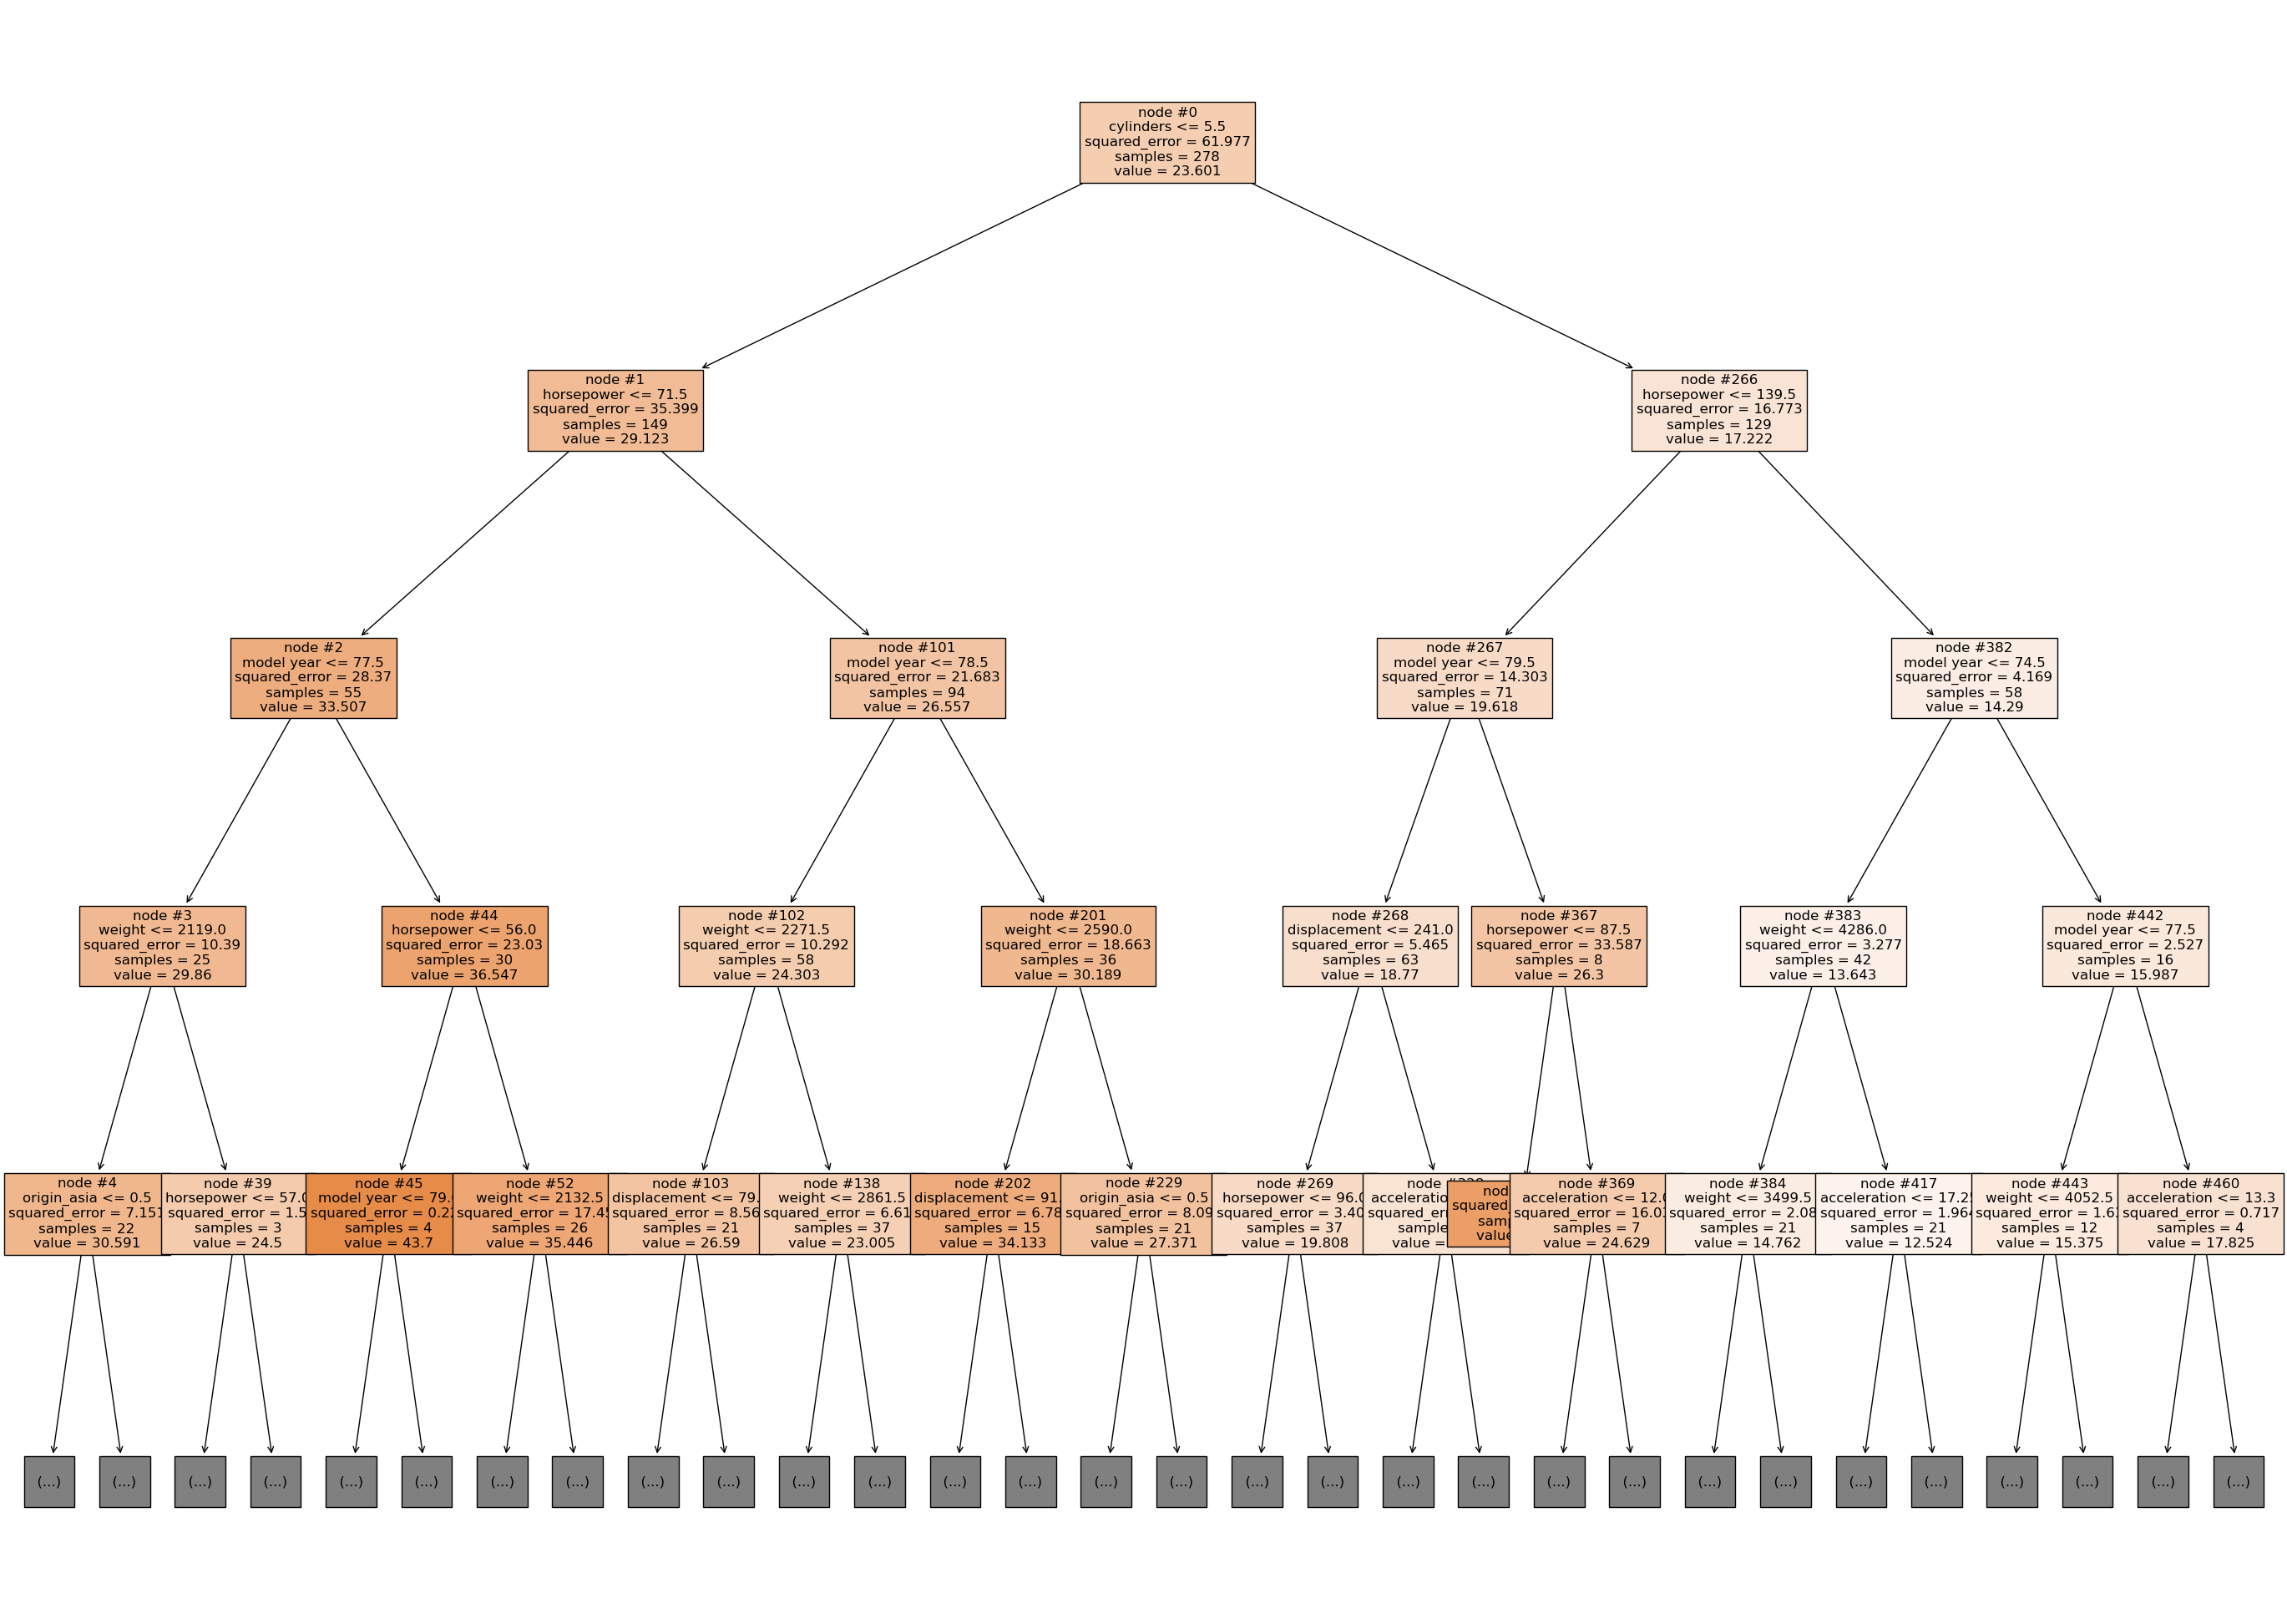

In [75]:
features = list(X1.columns)

plt.figure(figsize=(35,25))
plot_tree(dt, max_depth=4, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

#### Let's plot the feature importance for each variable in the dataset and analyze the variables

### Checking Feature importance

C:\Users\joshu\anaconda3\learning andaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

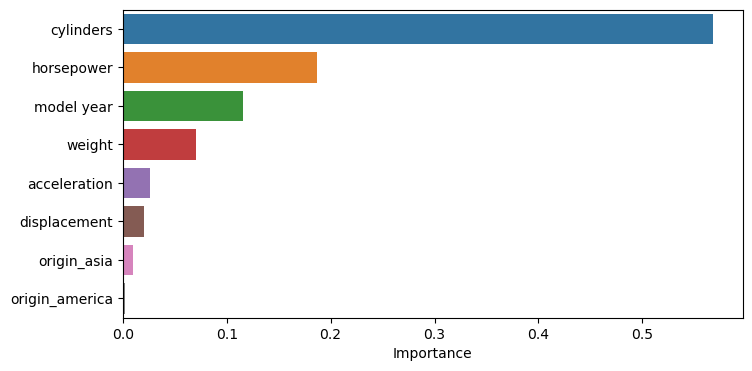

In [77]:
#find feature importance decision tree and complete the code

importances = dt.feature_importances_

columns=X1.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(importance_df.Importance,importance_df.index)

### Building Random Forest

In [78]:
#importing random forest regressor usinf sklearn

from sklearn.ensemble import RandomForestRegressor

#### Parameters for regression
**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**max_depth**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [84]:
 from sklearn.ensemble import RandomForestRegressor

# Define and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=1)
rf.fit(X_train1, y_train1)

# Now, check the performance on the test set
rf_score = rf.score(X_test1, y_test1)
print("Random Forest Test Set Score (R²):", rf_score)


Random Forest Test Set Score (R²): 0.8665991000897517


### Q.7 Check performance of Random Forest

In [85]:
# checking model performance on test dataset
rf.score(X_test1,y_test1)

0.8665991000897517

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_pref(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculating RMSE and MAE
    print(pd.DataFrame({
        "Data": ["Train", "Test"],
        "RMSE": [
            np.sqrt(mean_squared_error(y_train, y_pred_train)),
            np.sqrt(mean_squared_error(y_test, y_pred_test)),
        ],
        "MAE": [
            mean_absolute_error(y_train, y_pred_train),
            mean_absolute_error(y_test, y_pred_test),
        ],
    }))




In [91]:
model_pref(rf, X_train1, X_test1, y_train1, y_test1)


    Data      RMSE       MAE
0  Train  1.031129  0.714655
1   Test  2.792766  1.957267


### Question 8 & 9: Checking the feature importance of each variable in Random Forest and comparing to Decision Tree

C:\Users\joshu\anaconda3\learning andaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Importance'>

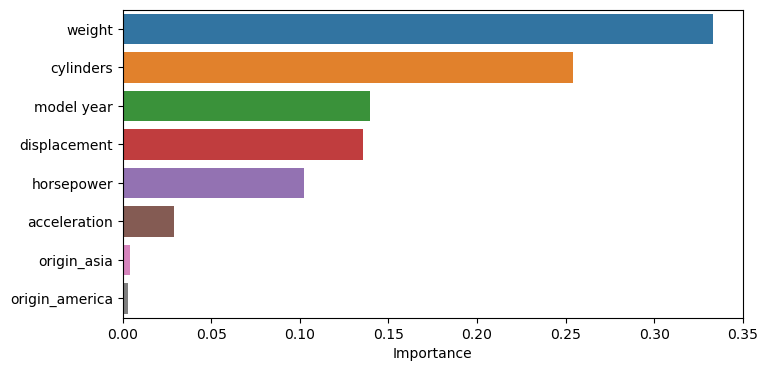

In [93]:
#print feature importance Random forest and complete the code
importances = rf.feature_importances_


columns=X1.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(importance_df.Importance,importance_df.index)

### Question 10: Comparing results of three model

In [94]:
print("Linear Regression")
model_pref(model1, X_train_ols, X_test_ols,y_train,y_test)
print("Decision tree")
model_pref(dt, X_train1, X_test1,y_train1,y_test1)
print("Random Forest")
model_pref(rf, X_train1, X_test1,y_train1,y_test1)  

Linear Regression
    Data      RMSE       MAE
0  Train  3.394323  2.653321
1   Test  3.026711  2.354281
Decision tree
    Data      RMSE       MAE
0  Train  0.000000  0.000000
1   Test  3.921777  2.521667
Random Forest
    Data      RMSE       MAE
0  Train  1.031129  0.714655
1   Test  2.792766  1.957267


The output compares the performance of three models: Linear Regression, Decision Tree, and Random Forest based on RMSE and MAE for both train and test sets.

Linear Regression does okay, but its errors are higher.
Decision Tree overfits badly—zero error on training data, but poor generalization on test data.
Random Forest has the lowest test error and generalizes the best, making it the most reliable model.
Bottom line: Random Forest is the best choice because it balances accuracy and avoids overfitting.